<a href="https://colab.research.google.com/github/Tung0000/Detection_CS_Fruit_Yolov8s/blob/main/Train_Custom_test_updatev1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ติดตั้ง Library ที่จำเป็น

#โหลด Dataset จาก Roboflow

In [ ]:
!pip install ultralytics

In [ ]:
import ultralytics
from ultralytics import YOLO

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

#  เช็คโดยใช้ ImageDataGenerator

In [ ]:
#import matplotlib.pyplot as plt

In [ ]:
#import numpy as np
#import matplotlib.pyplot as plt
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#import tensorflow as tf

In [ ]:
##ImageDataGenerator()

In [ ]:
#datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,brightness_range=[0.5,1.5], rotation_range=20,horizontal_flip=True)

#train_test=datagen.flow_from_directory(train_dir,target_size=(64,64),batch_size=32,class_mode='categorical')

In [ ]:
#datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,brightness_range=[0.5,1.5], rotation_range=20,horizontal_flip=True)

#valid_test=datagen.flow_from_directory(valid_dir,target_size=(64,64),batch_size=32,class_mode='categorical')

In [ ]:
#x=train_test.samples
#y=train_test.class_indices
#z=train_test.num_classes
#a=train_test.batch_size
#print(x,y,z,a)

In [ ]:
#x=valid_test.samples
#y=valid_test.class_indices
#z=valid_test.num_classes
#a=valid_test.batch_size
#print(x,y,z,a)

In [ ]:
#plt.imshow(train_test[0][0][0])

In [ ]:
#train_test.class_indices

In [ ]:
#ids,counts= np.unique(train_test.classes, return_counts=True)
#print(f"มี class เท่ากับ {ids}")
#print(counts)

In [ ]:
#labels = (train_test.class_indices)
#labels = dict((v,k) for k,v in labels.items())
#labels

#for i in ids:
#    print('{:>6} = {}' . format(labels[i], counts[i]))

In [ ]:
#train_test[0][0][0].shape

In [ ]:
#valid_test[0][0][0].shape

#  Train Model Yolo ด้วย Dataset ที่เตรียมไว้

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="0100tTC6iSisNdselYOb")
project = rf.workspace("object-detection-fruit").project("fruit-smrhb")
version = project.version(7)
dataset = version.download("yolov8")

In [ ]:
models = YOLO("yolov8s.pt")

In [ ]:
dataset="/content/Fruit-7/data.yaml"

In [ ]:
models.info()

In [ ]:
in_shape=(64,64,3)

#ใช้ Augmentation มาช่วย

In [ ]:
from ultralytics import YOLO

# โหลดโมเดล
model = YOLO("yolov8s.pt")

# เทรนพร้อม custom augmentation
model.train(
    data=dataset,
    epochs=30,
    imgsz=640,
    augment=True,  # เปิดใช้ augmentation
    degrees=20,    # หมุน
    scale=0.5,     # random scale
    flipud=0.3,    # flip vertical
    fliplr=0.5,    # flip horizontal
    hsv_h=0.015,   # ปรับ hue
    hsv_s=0.7,     # ปรับ saturation
    hsv_v=0.4      # ปรับ brightness
)


#โหลด model แบบบลดขนาด

In [ ]:
from ultralytics import YOLO

# โหลดโมเดลที่ train เสร็จ
model = YOLO("/content/best.pt")

# Export เป็น ONNX
model.export(format="onnx", opset=12)

# Export เป็น TFLite แบบ quantized INT8
model.export(format="tflite", int8=True)

#เช็ต parameters

In [ ]:
from ultralytics import YOLO

models = YOLO(model)
total_params = sum(p.numel() for p in model.model.parameters())
print(f"Total parameters: {total_params/1e6:.2f} M")

#แสดงผลลัพธ์จากการ Train Model





##แสดง Confusion Metrix

In [ ]:
import matplotlib.pyplot as plt

img=('/content/runs/detect/train/confusion_matrix.png')
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/content/runs/detect/train/train_batch1941.jpg')
plt.figure(figsize=(10,8))
plt.imshow(img)
plt.axis("off")
plt.show()

##แสดงภาพตัวอย่างที่ทำนายแล้ว จากการ Valid

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# โหลดรูป
img_left = mpimg.imread('/content/runs/detect/train/val_batch0_labels.jpg')
img_right = mpimg.imread('/content/runs/detect/train/val_batch0_pred.jpg')

plt.figure(figsize=(15, 15))  # กำหนดขนาดรวม

# รูปซ้าย (index=1)
plt.subplot(1, 2, 1)
plt.imshow(img_left)
plt.axis("on")

# รูปขวา (index=2)
plt.subplot(1, 2, 2)
plt.imshow(img_right)
plt.axis("on")

plt.show()

#ดาวน์โหลด Model ไปใช้

In [ ]:
from google.colab import files
# ระบุเส้นทางของไฟล์ที่ต้องการดาวน์โหลด
file_path ='/content/best.pt'
# ดาวน์โหลดไฟล์
files.download(file_path)

# การนำโมเดลที่สำเร็จแล้วมาใช้ (ใน Colab)

In [ ]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
from google.colab import files
import os

## อัพโหลดไฟล์รูปที่ต้องการค้นหาวัตถุ เพิ่มแบบปกติเอาก็ได้

In [ ]:
"""
uploaded = files.upload("")  # เรียกใช้ตัวอัพโหลดรูปของ Colab
if not uploaded:
    raise FileNotFoundError("No file uploaded!")
test_image_path = next(iter(uploaded.keys()))  # เก็บชื่อไฟล์เข้าสู่ตัวแปร
"""

## เรียกใช้โมเดลที่ Train ไว้แล้ว

In [ ]:
model_best_pt="/content/best (2).pt"

In [ ]:
# โหลดโมเดล best
model = YOLO(model_best_pt)

In [ ]:
model.info()

In [ ]:
class_names=model.names

print(class_names)

In [ ]:
for class_name , class_id in class_names.items():
    print(class_name,class_id)

In [ ]:
 for box , conf, cls_id in zip(xyxy, confidences, class_ids):
                x1,y1,x2,y2 = box
                width = x2-x1
                height = y2-y1
                area = width*height

                class_names_str = class_name_dict[cls_id]

                print(f"Frame {frame_index} ตรวจพบ {class_names_str} | Conf: {conf:.2f} | Area: {area:.0f} พิกเซล")
                annotated_frame = result.plot()


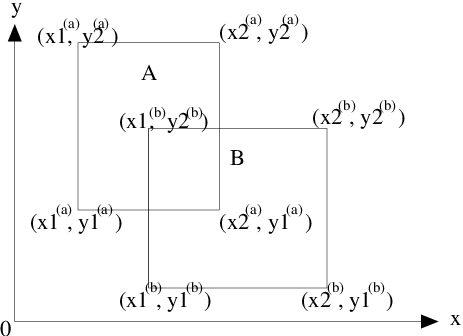
#
x1	พิกัดแนวนอนของมุมซ้ายบน	(บน–ซ้าย)
y1	พิกัดแนวตั้งของมุมซ้ายบน	(บน–ซ้าย)
x2	พิกัดแนวนอนของมุมขวาล่าง	(ล่าง–ขวา)
y2	พิกัดแนวตั้งของมุมขวาล่าง	(ล่าง–ขวา)

In [ ]:
# --- 1. SETUP ---
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

model_path = "/content/best (2).pt"
model = YOLO(model_path)
class_name_dict = model.names

print(f"โมเดลของคุณคือ {model_path}")
print(f"จำนวน class ของคุณคือ: {class_name_dict}")

INPUT_SOURCE = "/content/10835.jpg"

# --- 2. PREDICT ---
if model is not None:
    IS_STREAM = isinstance(INPUT_SOURCE, int) or INPUT_SOURCE.endswith(('.mp4', '.avi', '.mov'))

    predict_generator = model.predict(
        source=INPUT_SOURCE,
        stream=IS_STREAM,
        conf=0.05,
        iou=0.7,
        show=False,
        save=True,
        project="content/Videopredict",
        name="Test1",
        exist_ok=True,
    )

    for frame_index, result in enumerate(predict_generator):
        boxes = result.boxes
        current_frame_video = result.orig_img

        if boxes is not None and len(boxes) > 0:
            xyxy = boxes.xyxy.cpu().numpy()
            confidences = boxes.conf.cpu().numpy()
            class_ids = boxes.cls.cpu().numpy().astype(int)

            for box, conf, cls_id in zip(xyxy, confidences, class_ids):
                x1, y1, x2, y2 = box
                width = x2 - x1
                height = y2 - y1
                area = width * height

                class_name_str = class_name_dict[cls_id]
                print(f"Frame {frame_index} ตรวจพบ {class_name_str} | Conf: {conf:.2f} | Area: {area:.0f} พิกเซล")

                annotated_frame = result.plot()

                # --- 5. DISPLAY ---
                cv2_imshow(annotated_frame)

                wait_time = 1 if IS_STREAM else 0
                if cv2.waitKey(wait_time) & 0xFF == ord("q"):
                    print("หยุดโดยผู้ใช้งาน")
                    break

    cv2.destroyAllWindows()
    print("จบกระบวนการ")


In [ ]:
detections = []

for box, conf, cls_id in zip(xyxy, confidences, class_ids):
    x1, y1, x2, y2 = box
    width = x2 - x1
    height = y2 - y1
    area = width * height
    class_name_str = class_name_dict[cls_id]

    detections.append({
        "class": class_name_str,
        "confidence": float(conf),
        "x1": int(x1),
        "y1": int(y1),
        "x2": int(x2),
        "y2": int(y2),
        "area": float(area)
    })

print(detections)


In [ ]:
import pandas as pd
pd.DataFrame(detections).to_csv("result.csv", index=False)


In [ ]:
for det in detections:
    crop = current_frame_video[int(det["y1"]):int(det["y2"]), int(det["x1"]):int(det["x2"])]
    cv2_imshow(crop)
